# t-SNE を用いて取得した1280次元のベクトルを2次元に圧縮する

## 1. t-SNE で次元圧縮

In [10]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import csv

# データを読み込む
data_filename = "../data/esm-embedding-dim-1280.csv"

aa_list = []
embedding_dict = {}

with open(data_filename, "r", encoding="utf-8", newline="") as csv_file:
    data = csv.reader(csv_file)

    for row in data:
        aa = row[0]
        vec = row[1:]

        aa_list.append(aa)
        embedding_dict[aa] = vec


# 1280次元ベクトルを配列にまとめる
vecs = np.array([embedding_dict[aa] for aa in aa_list])

# t-SNEで2次元に圧縮（初期seedで再現性確保）
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vecs_2d = tsne.fit_transform(vecs)

## 2. 2次元散布図に可視化

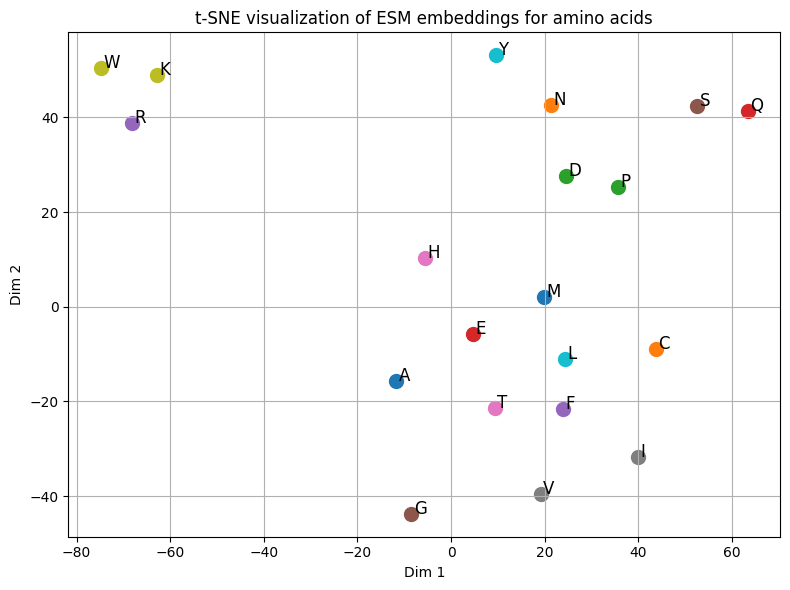

In [11]:
plt.figure(figsize=(8, 6))

for i, aa in enumerate(aa_list):
    x, y = vecs_2d[i]
    plt.scatter(x, y, s=100)
    plt.text(x + 0.5, y, aa, fontsize=12)

plt.title("t-SNE visualization of ESM embeddings for amino acids")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. CSV に保存

In [14]:
save_filename = "../data/esm-embedding-dim-2.csv"

with open(save_filename, "w", encoding="utf-8", newline="") as csv_file:
    writer = csv.writer(csv_file)

    for i in range(len(aa_list)):
        row = [aa_list[i]] + vecs_2d[i].tolist()
        writer.writerow(row)